<a href="https://colab.research.google.com/github/rexian/ML/blob/main/pytorch/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tensors

In [ ]:
import torch
import numpy as np

In [ ]:
np1 = np.random.rand(3,4)
np1

array([[0.65727173, 0.31390899, 0.30395187, 0.73049325],
       [0.15984294, 0.83121918, 0.18757679, 0.65298281],
       [0.91511112, 0.09521331, 0.0380786 , 0.70434974]])

In [ ]:
tensor_2d = torch.randn(3,4)
tensor_2d

tensor([[-0.0203,  0.1082,  0.9384,  0.4005],
        [ 1.0729, -1.7529, -0.9982,  0.1582],
        [-1.6172,  0.6904,  0.9998, -2.5733]])

In [ ]:
tensor_np = torch.from_numpy(np1)
tensor_np

tensor([[0.6573, 0.3139, 0.3040, 0.7305],
        [0.1598, 0.8312, 0.1876, 0.6530],
        [0.9151, 0.0952, 0.0381, 0.7043]], dtype=torch.float64)

In [ ]:
tensor = torch.arange(10)
tensor

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# Reshape and View
t1 = tensor.reshape(2,5)
t1

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [ ]:
t2 = torch.arange(12)
t2

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
t3 = t2.view(4,3)
t3

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])

In [ ]:
t3[1][2] = 34
t3

tensor([[ 0,  1,  2],
        [ 3,  4, 34],
        [ 6,  7,  8],
        [ 9, 10, 11]])

In [ ]:
t3[1][2]

tensor(34)

In [ ]:
t3[:,1]

tensor([ 1,  4,  7, 10])

In [ ]:
t3[1, :]

tensor([ 3,  4, 34])

In [ ]:
tensor_a = torch.tensor([1,2,3,4,5])
tensor_b = torch.tensor([6,7,8,9,10])
result = torch.add(tensor_a, tensor_b)
result

tensor([ 7,  9, 11, 13, 15])

In [ ]:
result = torch.sub(tensor_b, tensor_a)
result

tensor([5, 5, 5, 5, 5])

In [ ]:
result = torch.mul(tensor_a, tensor_b)
result

tensor([ 6, 14, 24, 36, 50])

In [ ]:
result = torch.div(tensor_b, tensor_a)
result

tensor([6.0000, 3.5000, 2.6667, 2.2500, 2.0000])

In [ ]:
result = torch.remainder(tensor_b, tensor_a)
result

tensor([0, 1, 2, 1, 0])

In [ ]:
result = torch.pow(tensor_a, tensor_b)
result

tensor([      1,     128,    6561,  262144, 9765625])

Neural Network

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Create a Model class that inherits Module
class Model(nn.Module):
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = f.relu(self.fc1(x))
    x = f.relu(self.fc2(x))
    x = self.out(x)
    return x

In [ ]:
torch.manual_seed(42)
model = Model()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)


In [ ]:
# Change species column from string to float
df['species'] = df['species'].replace({'setosa':0.0, 'versicolor':1.0, 'virginica':2.0})

<ipython-input-59-2ddcb624bd75>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df['species'].replace({'setosa':0.0, 'versicolor':1.0, 'virginica':2.0})


In [ ]:
# Train test split: Set X, Y
X = df.drop('species', axis=1).values
y = df['species'].values

# Convert these to numpy arrays
x = X
y = y

In [ ]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Set the criterion of model to measure the error, how far off the prediction from data
criterion = nn.CrossEntropyLoss()
# Choose Adam optimizer, lr = learning rate (if eror does not go down after a bunch of iteration)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# Train our model
# Epochs? (one run thru all the training data in our network)
import torch.nn.functional as f
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)

  # Keep track of losses
  losses.append(loss.detach().numpy())

  # Print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch {i}, loss {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch 0, loss 1.0935204029083252
Epoch 10, loss 0.9156657457351685
Epoch 20, loss 0.7562994360923767
Epoch 30, loss 0.6108629107475281
Epoch 40, loss 0.44145309925079346
Epoch 50, loss 0.2723323404788971
Epoch 60, loss 0.16078141331672668
Epoch 70, loss 0.09846454113721848
Epoch 80, loss 0.06856968998908997
Epoch 90, loss 0.053720779716968536


Text(0.5, 0, 'epoch')

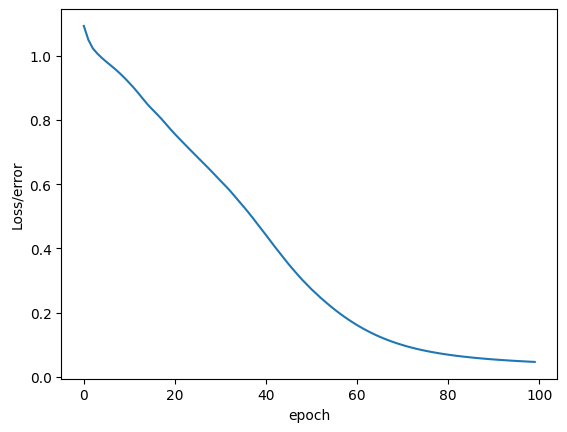

In [ ]:
# Graph it out

plt.plot(range(epochs), losses)
plt.ylabel('Loss/error')
plt.xlabel('epoch')

In [ ]:
# Evaluate Model on test data set (validate model on test set)
with torch.no_grad(): # Turn off back propagation
  y_eval = model.forward(X_test) # X_test are features from test data set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error

In [ ]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    # Will indicate what type of flower the network thinks it is
    print(f'{i+1}. {str(y_val)}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1
print(f'Correct: {correct}')

1. tensor([-4.9014,  3.6766,  6.4883])
2. tensor([-7.4458,  2.4418,  9.1490])
3. tensor([-7.6378,  3.5400,  9.5076])
4. tensor([-1.0001,  6.3459,  2.5383])
5. tensor([-6.0028,  3.7181,  7.7264])
6. tensor([0.7767, 6.8187, 0.7138])
7. tensor([-4.0793,  4.4034,  5.6892])
8. tensor([-0.6248,  6.4670,  2.1489])
9. tensor([-4.9591,  4.0803,  6.6220])
10. tensor([-7.7881,  2.6545,  9.5597])
11. tensor([-3.6737,  4.5547,  5.2627])
12. tensor([ 7.9123,  2.5814, -6.5529])
13. tensor([ 7.1133,  2.2449, -5.8508])
14. tensor([1.2906, 5.4687, 0.0467])
15. tensor([ 7.0514,  2.8953, -5.7034])
16. tensor([-3.4022,  5.0488,  5.0158])
17. tensor([ 7.3751,  2.4968, -6.0614])
18. tensor([-4.4830,  4.0366,  6.0780])
19. tensor([ 7.6580,  2.4743, -6.3294])
20. tensor([ 6.4883,  2.3806, -5.2468])
21. tensor([1.0048, 6.1252, 0.4048])
22. tensor([-6.9013,  3.2458,  8.6608])
23. tensor([ 7.2306,  2.7325, -5.8936])
24. tensor([ 7.4680,  2.3943, -6.1625])
25. tensor([1.3257, 6.0880, 0.0990])
26. tensor([0.5316, 6

In [ ]:
new_iris = torch.tensor([5.6, 3.7, 2.2, 0.5])
with torch.no_grad():
  print(model.forward(new_iris))

tensor([ 6.9530,  3.5579, -5.5200])


In [ ]:
new_iris = torch.tensor([5.6, 4.2, 1.2, 0.5])
with torch.no_grad():
  print(model.forward(new_iris))

tensor([ 8.5487,  2.8494, -7.1122])


In [ ]:
# Save and load NN model
torch.save(model.state_dict(), 'iris_model.pt')


In [ ]:
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt', weights_only=True))
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [ ]:
# Convolutional NN
